# Auswertung

## 1. Aufnahme des 'Sonnenspektrums'

Zuerst werden wir die vorher aufgenommenen Spektren für das Himmelslicht mit und ohne Fenster übereinander plotten. Daraus können wir dann die Absorptionsverhältnisse entnehmen.

(250, 850)

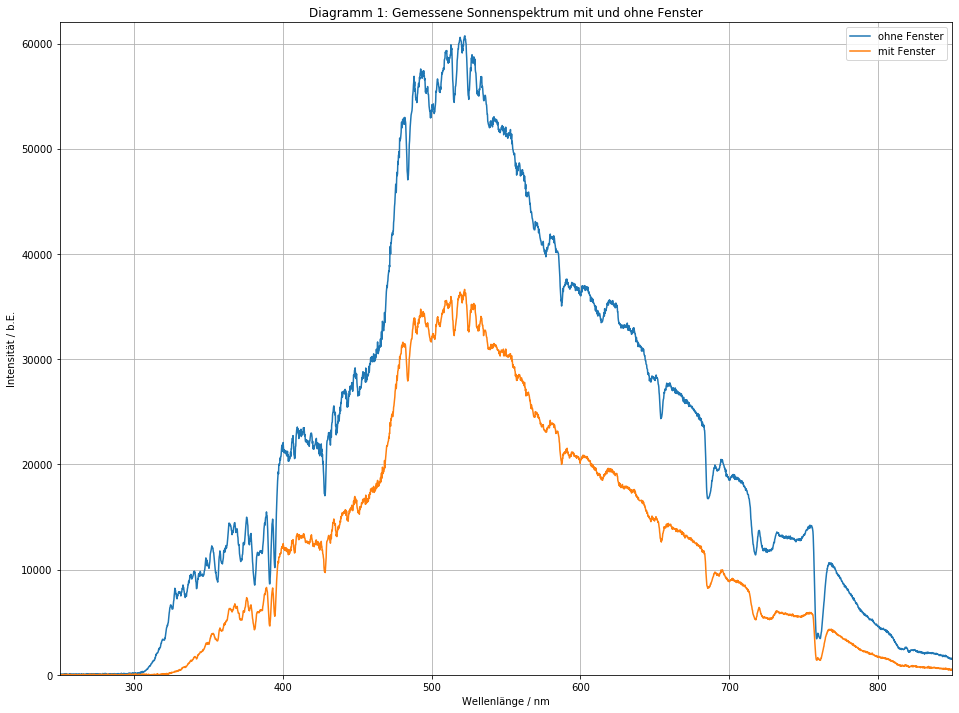

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

#Messung des Himmellichts ohne Glas
wl_og, int_og = np.loadtxt('https://raw.githubusercontent.com/Meistermagier/PAP2/master/Experiment%20234/Versuch%20234/Himmeloffen2.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)
#Messung des Himmellichts mit Glas
wl_mg, int_mg = np.loadtxt('https://raw.githubusercontent.com/Meistermagier/PAP2/master/Experiment%20234/Versuch%20234/Himmelgesch2.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)

plt.figure(figsize=(16,12))
plt.plot(wl_og, int_og, label = 'ohne Fenster')
plt.plot(wl_mg, int_mg, label = 'mit Fenster')
plt.title('Diagramm 1: Gemessene Sonnenspektrum mit und ohne Fenster')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Intensität / b.E.')
plt.legend()
plt.grid()
plt.ylim((0,62000))
plt.xlim((250,850))
#plt.savefig("figures/Himmel_m_o_G.pdf", format="pdf")

Die Absorption von Glas wurde durch der Formel
\begin{equation} A_{Glas} = 1 - \frac{I_{mG}(\lambda)}{I_{oG}(\lambda)} \tag{6} \end{equation}
berechnet, wobei $I_{mG}$ die gemessene Intensität mit und $I_{oG}$ ohne Fensterglas darstellen.<br>

Die Wellenlängen größer als 320 nm sind in dem folgenden Diagramm dargestellt.

(320, 800)

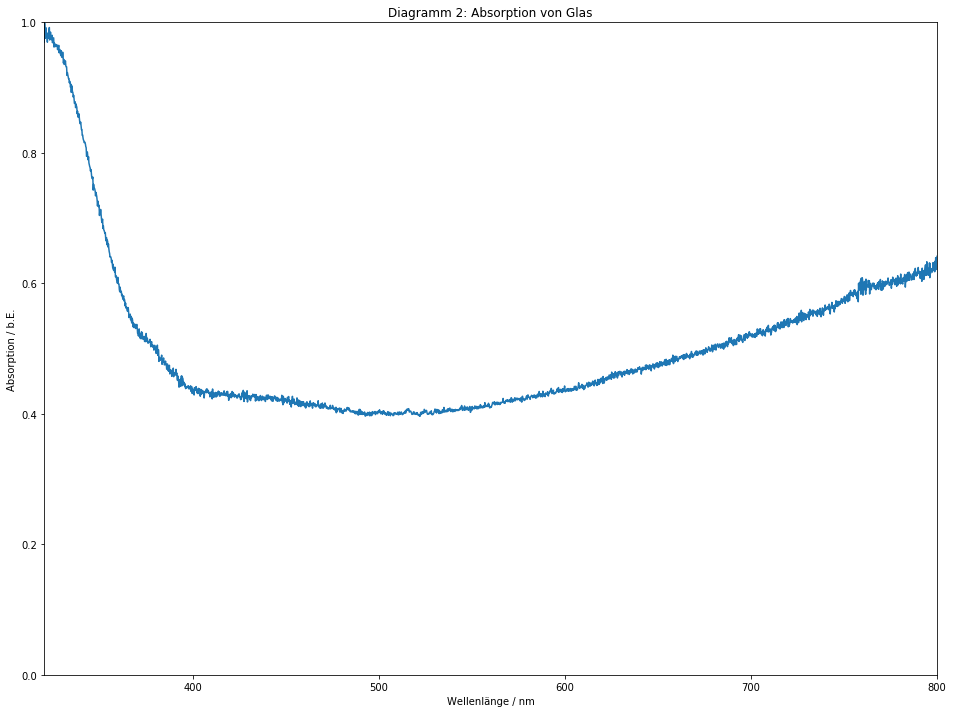

In [3]:
A = 1-int_mg/int_og

plt.figure(figsize=(16,12))
plt.plot(wl_mg, A)
plt.title('Diagramm 2: Absorption von Glas')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Absorption / b.E.')
plt.ylim((0,1))
plt.xlim((320,800))
#plt.savefig("figures/ABsorption_Glas.pdf", format="pdf")

Aus diesem Absortionsdiagramm können wir nun das Absorptionsverhalten von Glas erkennen. Wir erkennen, dass das Glas zwischen 400 nm und 600 nm am wenigsten der Intensität absorbiert. Wir können erkennen, dass von 380 nm bis zu ca. 300 nm die Absorption steil in die Höhe schnellt bis sie bei ca. 300 nm bei maximaler Absorption angekommen ist. Dies könnte unter anderem daran liegen, dass das aufgenommene Spektrum nur bis ca. 300 nm geht und ab dort keine Intensitäten mehr aufgenommen wurden, weder hinter dem Fenster noch vor dem Fenster. Von 600 nm bis 800 nm können wir einen stetigen aber langsam steigenden Aufwärtstrend der Absorption beobachten. Das heißt für mittlere Wellenlängen zwischen 400 nm und 600 nm ist die Absorption minimal wärend sie bei höheren oder niedrigereren Wellenlängen wieder stetig steigt.

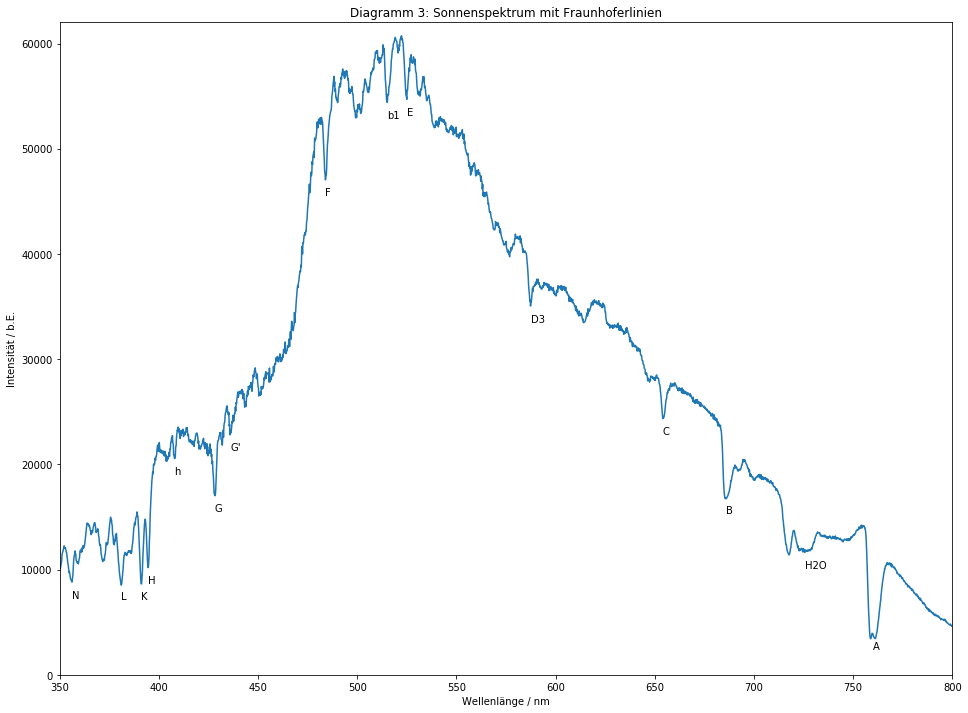

In [8]:
from scipy import signal

%matplotlib inline
plt.figure(figsize=(16,12))
plt.plot(wl_og, int_og)
plt.title('Diagramm 3: Sonnenspektrum mit Fraunhoferlinien')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Intensität / b.E.')
plt.ylim((0,62000))
plt.xlim((350,800))

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

Lines = np.genfromtxt('https://raw.githubusercontent.com/Meistermagier/PAP2/master/Experiment%20234/MoreData/Fraunhofer.csv',delimiter="," ,skip_header = 1, dtype= None,encoding="UTF-8")
wlist = []

for i in Lines['f2']:
   wlist.append(find_nearest(wl_og,i))

for i in np.arange(len(wlist)):
    h = wlist[i]
    plt.annotate(Lines['f0'][i], (wl_og[h], int_og[h]),xytext=(wl_og[h], int_og[h]-1500))
#ple.savefig("figures/Fraunhofer.pdf", format="pdf")

Nun haben wir aus unserem gemessenen Spektrum die Fraunhoferlinien ermittelt und diese in unser Diagramm eingezeichnet. Wir können die meisten wichtigen Fraunhofer Linien erkennen und am linken Rand sogar noch die N und L Linien. Auch können wir sehr schön das H2O Absorptionspektrum im Bereich zwischen 717 nm und 725 nm erkennen. Die mit den Hγ und Hδ der Balmerserie übereinstimmenden G' und h Linien sind allerdings nur schwach erkennbar und würden sich nicht vom Rauschen herabheben wenn wir nicht wüssten an welcher Stelle sie zu suchen sind. Die Helium Linie $D_3$ ist bei ca. 587.4 nm dort zu finden wo sie erwartet wurde. In folgender Tabelle sind die ermittelten Werte der Fraunhofer Linien und ihre Abweichungen vom Literaturwert.

<center><u> Tabelle 1: Ermittelte Fraunhofer Linien</u><\center>

| Linie | Element | Wellenlänge | Literaturwert | Abweichung |
|-------|---------|-------------|---------------|------------|
| A     | O2      | 759.8       | 759.4         | 0.4        |
| H2O   | H2O     | 725.7       | -             | -          |
|       | H2O     | 717.8       | -             | -          |
| B     | O2      | 685.8       | 686.7         | 0.9        |
| C     | Ha      | 654.0       | 656.3         | 2.3        |
| D3    | Helium  | 587.4       | 587.6         | 0.2        |
| E     | Fe      | 525.0       | 527.0         | 2.0        |
| b1    | Mg      | 515.2       | 518.4         | 3.2        |
| F     | Hb      | 484.0       | 486.1         | 2.1        |
| G'    | Hγ      | 435.9       | 434.0         | 1.9        |
| G     | Fe+Ca   | 428.3       | 430.8         | 2.5        |
| h     | Hδ      | 407.9       | 410.1         | 2.2        |
| H     | Ca      | 394.6       | 396.8         | 2.2        |
| K     | Ca      | 391.2       | 393.4         | 2.2        |
| L     | Fe      | 381.0       | 382.0         | 1.0        |
| N     | Fe      | 356.2       | 358.1         | 1.9        |

Wir Erkennen die mittlere Abweichung beträgt ca. 1.8 nm vom Literaturwert. Die größte Abweichung befindet sich bei der b1 Linie von Magnesium und die D3 Heliumlinie wurde sehr genau bestimmt.

## 2. Qualitativer Vergleich einfacher Lichtquellenspektren

Wir haben zwei verschieden Diagramme erstellt, einmal haben wir die verschiedenen LED Spektren in ein Diagramm überlagert und einmal die restlichen Lichtquellen (Glühlampe,Energiesparlampe,Laser etc.).
Wir Schätzen die mitleren Wellenlängen aus diesen Diagrammen ab.

<center><u>Tabelle 2: Mittlere Wellenlängen verschiedener Lichtquellen</u><\center>

|Lichtquelle|Laser|LED|Glühlampe|Glühbirne|Energiespaarlampe|
|-----------|-----|---|---------|---------|-----------------|
|Farbe|Grün|Orange|Rot|Rot|Rot|
|Wellenlänge [nm]|532|600|625|625|610|

<br><br>
<center><u> Tabelle 3: Mittlere Wellenlängen verschiedener LED Lichtquellen</u><\center>
    
|LED Farbe|RGB|Weiß|Blau|Gelb|Orange|Rot|Weiß Warm 1|Weiß Warm 2|
|-----------|-----|---|---------|---------|-----------------|---|---|---|
|Wellenlänge [nm]|630*|450|460|590|616|632|564|564|
   

*Das RGB Licht besteht hierbei aus mehreren verschiedenen Peaks, deshalb wurde hier der höchste Peak eingetragen.

Hierbei ist anzumerken dass einige Lichtquellen, wie zum Beispiel Glühbirne und LED, welche „weißes“ Licht ausstrahlen, ein sehr breites Spektrum besitzen. Für all diese wurde der höchste Peak für die mittlere Wellenlänge verwendet, da diese Werte am meisten zum Licht beitragen. Besonders beim RGB kann man sehr gut erkennen wie dieses sein Licht und seine Farben aus der Überlagerung von 3 Farben, Rot, Grün und Blau, erstellt. Das Licht der weißen LED kann auf zwei Weisen erzeugt werden einmal durch eine blaue LED die eine phosphoreszierende Schicht anleuchtet. Das andere mal durch eine Additive Überlagerung von Rot, Grün und Blau was hier der Fall ist.<br><br>
Lampen die „Weißes Licht“ ausstrahlen werden in warm und kalt unterteilt dies hängt davon ab wie viel Rot oder Blauanteil ein „weißes Licht“ hat, analog zum planckschen Strahlungsgesetz. Die Glühlampen sind dementsprechend allesamt eher warm, ebenso einige LED Weißlichter. Das LED Licht, „White Light“ hat allerdings hohen Anteil an blauem Licht, daher ist es als eher kaltweiß einzuordnen.

## 3. Natriumspektrum

### 3.1.1 Schwache Linien

Es werden zur Bestimmung der Wellenlängen der beobachteten Linien die Messungen importiert und in einem interaktives Diagramm eingetragen. Die Fehlern der Wellenlänge sind aus der Halbwertsbreite der Linien abzuschätzen.<br>Es wurden zuerst die Intensitäten der Linien im Bereich 300 nm bis 540 nm beobachtet, und danach die Linien im Bereich 600 nm bis 850 nm.

(275, 540)

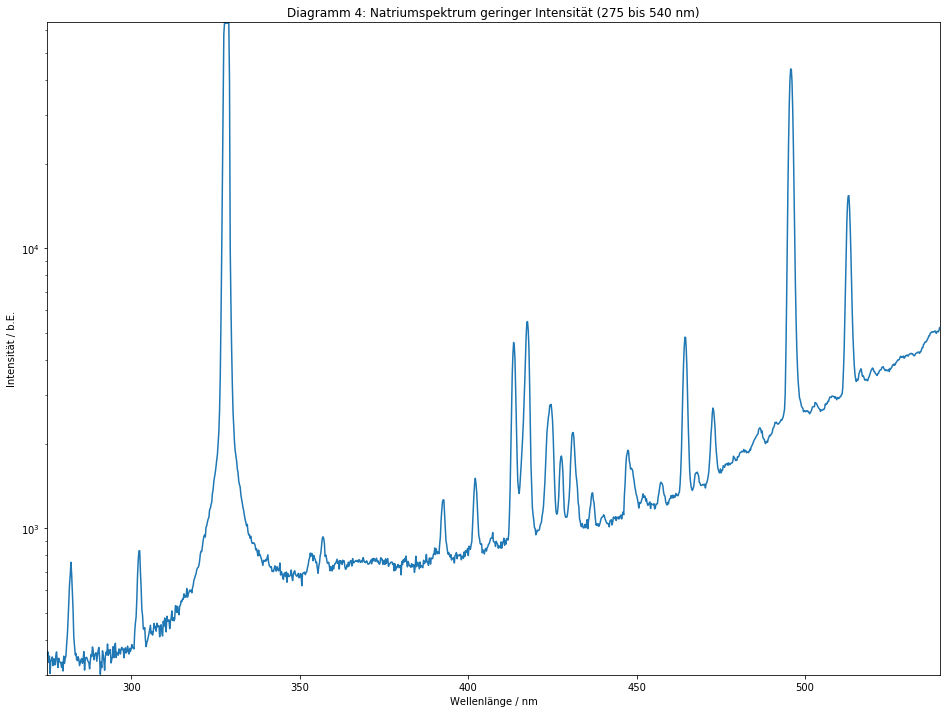

In [40]:
#%matplotlib notebook
#%matplotlib notebook
%matplotlib inline

#Kleiner Intensität 275 bis 540 nm
wl, inte = np.loadtxt('https://raw.githubusercontent.com/Meistermagier/PAP2/master/Experiment%20234/Versuch%20234/Linien%20kleiner%20Intensit%C3%A4t.txt', skiprows = 17, converters = {0:comma_to_float, 1: comma_to_float}, comments = '>', unpack=True)

plt.figure(figsize=(16,12))
plt.plot(wl, inte)
plt.title('Diagramm 4: Natriumspektrum geringer Intensität (275 bis 540 nm)')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Intensität / b.E.')
plt.yscale('log')
plt.ylim((300,64000))
plt.xlim((275,540))

Aus dem Diagramm 4 liest man die folgenden Werten für die Wellenlängen der beobackteten Linien ab:<br>
<br>
<center><u>Tabelle 4: Wellenlängen der Spektrallinien (300 nm bis 540 nm)</u></center>

|Wellenlänge [nm]|Fehler [nm]|
|----------------|-----------|
|512.871         |2.036      |
|495.674         |2.279      |
|472.674         |1.470      |
|464.419         |1.741      |
|457.192         |1.638      |
|447.436         |2.956      |
|440.208         |1.760      |
|436.821         |1.495      |
|431.077         |1.819      |
|427.653         |1.252      |
|424.399         |2.439      |
|417.561         |1.849      |
|413.509         |1.566      |
|402.115         |1.487      |
|392.647         |1.409      |
|282.143         |1.499      |

(600, 880)

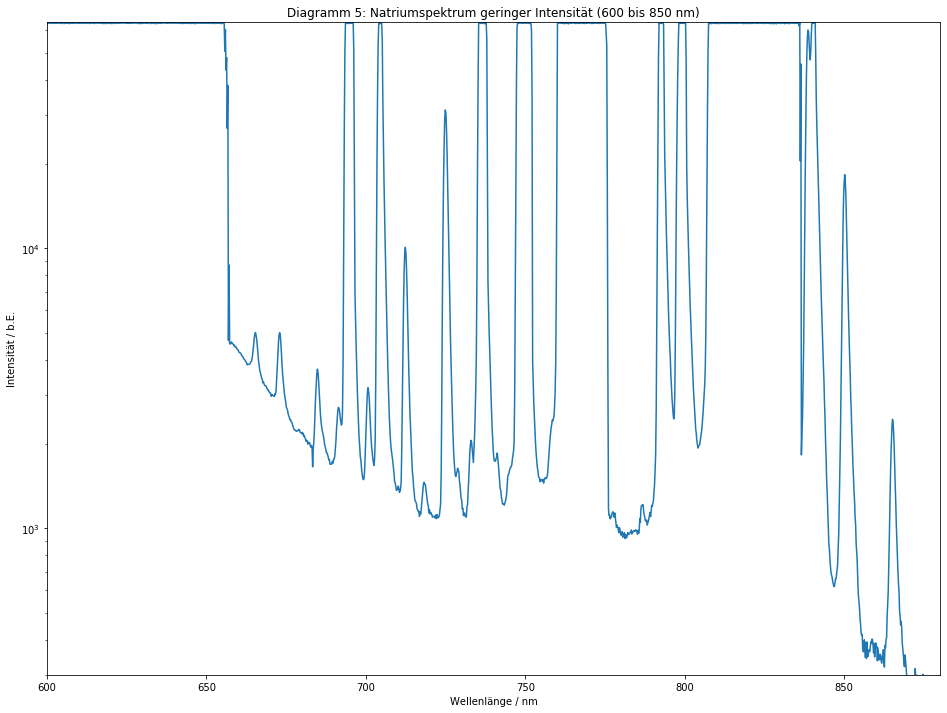

In [39]:
#%matplotlib notebook
%matplotlib inline

#Kleiner Intensität 600 bis 850 nm
wl, inte = np.loadtxt('https://raw.githubusercontent.com/Meistermagier/PAP2/master/Experiment%20234/Versuch%20234/Linien%20kleiner%20Intensit%C3%A4t.txt', skiprows = 17, converters = {0:comma_to_float, 1: comma_to_float}, comments = '>', unpack=True)

plt.figure(figsize=(16,12))
plt.plot(wl, inte)
plt.title('Diagramm 5: Natriumspektrum geringer Intensität (600 bis 850 nm)')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Intensität / b.E.')
plt.yscale('log')
plt.ylim((300,64000))
plt.xlim((600,880))

Aus dem Diagramm 5 liest man die folgenden Werten für die Wellenlängen der beobackteten Linien ab:<br>
<br>
<center><u>Tabelle 5: Wellenlängen der Spektrallinien (600 nm bis 850 nm)</u></center>

|Wellenlänge [nm]|Fehler [nm]|
|----------------|-----------|
|865.208         |2.293      |
|850.184         |3.100      |
|724.923         |2.338      |
|718.309         |1.507      |
|712.375         |1.911      |
|700.649         |1.529      |
|684.795         |1.799      |
|672.957         |1.529      |
|665.358         |1.402      |

### 3.1.2 Starke Linien

(300, 850)

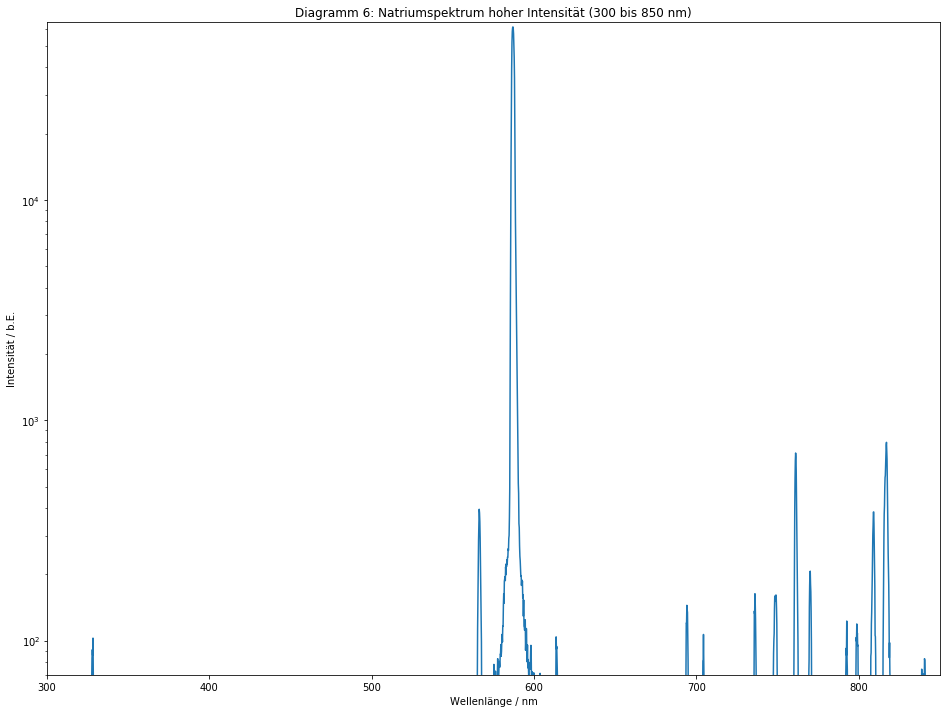

In [46]:
%matplotlib inline
#%matplotlib notebook

#Kleiner Intensität 300 bis 540 nm
wl, inte = np.loadtxt('https://raw.githubusercontent.com/Meistermagier/PAP2/master/Experiment%20234/Versuch%20234/Intensive%20Linien.txt', skiprows = 17, converters = {0:comma_to_float, 1: comma_to_float}, comments = '>', unpack=True)

plt.figure(figsize=(16,12))
plt.plot(wl, inte)
plt.title('Diagramm 6: Natriumspektrum hoher Intensität (300 bis 850 nm)')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Intensität / b.E.')
plt.yscale('log')
plt.ylim((70,64000))
plt.xlim((300,850))

Es werden zunächst wie beim schwachen Linien mit dem Cursor die Wellenlängen der intensiven Linien bestimmt und in das Diagramm aufgetragen. Die Fehler der Wellenlängen wurden auch aus der Halbwertsbreite der jeweiligen Linien abgeschätzt.

Aus dem Diagramm 6 liest man die folgenden Werten für die Wellenlängen der beobachteten Linien ab:<br>
<br>
<center><u>Tabelle 6: Wellenlängen der Spektrallinien (300 nm bis 850 nm)</u></center>

|Wellenlänge [nm]|Fehler [nm]|
|----------------|-----------|
|817.105         |2.072      |
|809.161         |1.420      |
|770.111         |1.366      |
|761.164         |1.315      |
|748.700         |2.400      |
|736.145         |1.416      |
|704.407         |1.639      |
|694.189         |1.475      |
|613.762         |1.936      |
|586.983         |1.990      |
|566.305         |1.504      |
|328.116         |1.750      |

### 3.2.1 Erwartete Linien für die 1. Nebenserie: $md \rightarrow 3p$

Es wird angenommen, dass der Korrekturterm für die d-Energieniveaus Null ist. Damit gilt für die Wellenlänge der einzelnen Übergänge:<br>
\begin{equation}
\frac{hc}{\lambda_m} = E_{Ry}[eV]/m^2 - E_{3p}[eV]
\tag{7}
\end{equation}
bzw.
\begin{equation}
\lambda_m[nm] = \frac{hc}{E_{Ry}[eV]/m^2 - E_{3p}[eV]} \approx \frac{1.2398 \cdot 10^3 [nm \space eV]}{-13.605 [eV]/m^2 - E_{3p}[eV]}
\tag{8}
\end{equation}<br>
wobei $h$ das Planck'sche Wirkungsquantum, $c$ die Lichtgeschwindigkeit, $E_{Ry}$ die Rydbergenergie, $m$ die Hauptquantenzahl des d-Niveaus und $E_{3p}$ die Energie des Zustands in Elektronenvolt darstellen.<br>

Nach dem Gaußschen Fehlerfortpflanzung ergibt sich für den Fehler:<br>

\begin{equation}
\Delta \lambda_m[nm] = \frac{hcm^4}{(m^2E_{3p}[eV] - E_{Ry}[eV])^2} \Delta E_{3p} \approx \frac{1.2398 \cdot 10^3 [nm \space eV] \space m^4}{(m^2E_{3p}[eV] + 13.605 [eV])^2} \Delta E_{3p}
\tag{9}
\end{equation}<br>

Die gemessene Linie des Werts von $\lambda = (817.1 \pm 2.07) nm$ ist der Hauptquantenzahl $m=3$ zuzuordnen. Damit ist der Wert der Energie des 3p Zustandes $E_{3p}$ zu berecnen. Durch Umformung der Gleichung (7) ergibt sich:

\begin{equation}
E_{3p} = \frac{E_{Ry}}{m^2} - \frac{hc}{\lambda_m}
\tag{10}
\end{equation}<br>
Nach dem Geußschen Fehlerfortpflanzung ist der Fehler der berechnete Energie:
\begin{equation}
\Delta E_{3p} = \frac{hc \Delta \lambda}{\lambda_m^2}
\tag{11}
\end{equation}
wobei $E_{Ry}=-13.605 eV$ und $hc = 1.2398 \cdot 10^3 nm \space eV$ (Quelle: Praktikumsanleitung Versuch 234)

Damit ergibt sich für die Energie des 3p Zustandes:

>$E_{3p} = (-3.029 \pm 0.004) \space eV$<br>

Mit diesem Wert können wir jetzt die erwartete Wellenlängen für die Nebenserie bis $m = 12$ berechnen.

In [8]:
E_3p = -3.029
for m in range(3,13):
    l=1.2398E3/(-13.605/m**2-E_3p)
    print('m={m:2d}, lambda={l:6.2f}'.format(m=m,l=l))
    
dE_3p = 0.004
for m in range(3,13):
    dl=(1.2398E3*m**4*dE_3p)/(m**2*E_3p+13.605)**2
    print('m={m:2d}, deltalambda={dl:6.2f}'.format(m=m,dl=dl))

m= 3, lambda=817.09
m= 4, lambda=569.06
m= 5, lambda=498.95
m= 6, lambda=467.66
m= 7, lambda=450.62
m= 8, lambda=440.20
m= 9, lambda=433.34
m=10, lambda=428.56
m=11, lambda=425.09
m=12, lambda=422.49
m= 3, deltalambda=  2.15
m= 4, deltalambda=  1.04
m= 5, deltalambda=  0.80
m= 6, deltalambda=  0.71
m= 7, deltalambda=  0.66
m= 8, deltalambda=  0.63
m= 9, deltalambda=  0.61
m=10, deltalambda=  0.59
m=11, deltalambda=  0.58
m=12, deltalambda=  0.58


Diese Werten werden die Linien des Natriumspektrums, die in der Teilen 3.1 und 3.2 der Auswertung bestimmt waren, in der folgende Tabelle zugeordnet.

<center><u>Tabelle 7: Linien der Ersten Nebenserie</u></center>

|m  |erwartete Wellenlänge [nm]|zugeordnete Wellenlänge [nm]|
|---|--------------------------|----------------------------|
|3  |$817.09 \pm 2.15$         |$817.105 \pm 2.072$         |
|4  |$569.06 \pm 1.04$         |$566.305 \pm 1.504$         |
|5  |$498.95 \pm 0.80$         |$495.786 \pm 2.279$         |
|6  |$467.66 \pm 0.71$         |$464.419 \pm 1.741$         |
|7  |$450.62 \pm 0.66$         |$447.436 \pm 2.956$         |
|8  |$440.20 \pm 0.63$         |$436.821 \pm 1.495$         |
|9  |$433.34 \pm 0.61$         |$431.077 \pm 1.819$         |
|10 |$428.56 \pm 0.59$         |$427.653 \pm 1.252$         |
|11 |$425.09 \pm 0.58$         |$424.399 \pm 2.439$         |
|12 |$422.49 \pm 0.58$         |$417.561 \pm 1.849$         |

Die gemessene (zugeordnete) Wellenlängen werden als Funktion von m in einem Diagramm eingetragen.

In [1]:
%matplotlib inline
neb_1 = np.genfromtxt('https://raw.githubusercontent.com/Meistermagier/PAP2/master/Experiment%20234/Natriumspektrum/Nebenserie1.csv', delimiter=',')
m = neb_1[1:,0]
#m = np.linspace(2.8,12.2,100)
wl_neb1 = neb_1[1:,2]
d_wl_neb1 = neb_1[1:,3]

plt.figure(figsize=(16,12))
#plt.plot(m,wl_neb1)
plt.errorbar(m, wl_neb1, yerr = d_wl_neb1, capsize=3, fmt='.k')
plt.title('Diagramm 7: Gemessene Wellenlänge als Funktion von m')
plt.xlabel('Quantenzahl m')
plt.ylabel('Wellenlänge / [nm]')

NameError: name 'np' is not defined

### 3.2.2 Erwartete Linien für die 2. Nebenserie: $ms \rightarrow 3p$

Die gelbe D-Linie des Natriums bei $\lambda = 589 nm$ entspricht dem Übergang $3p \rightarrow 3s$. Damit kann man die Bindungsenergie des Grundzustandes (in eV) berechnen durch:
\begin{equation}
E_{3s} = E_{3p} - \frac{hc}{\lambda} = E_{3p} - \frac{1.2398 \cdot 10^3}{\lambda}
\tag{12}
\end{equation}<br>

Ihre Fehler ist nach dem Gaußschen Fehlerfortpflanzung:
\begin{equation}
\Delta E_{3s} = \Delta E_{3p} = 0.004 eV
\tag{13}
\end{equation}<br>

Damit ergibt sich für die Energie des Grundeszustandes:
>$E_{3s} = (-5.134 \pm 0.004) eV$

Aus $E_{3s}$ berechnet man zunächst den Korrekturfaktor $\Delta_s$ gemäß
\begin{equation}
E_{3s} = \frac{-13.605 \space eV}{(3-\Delta_s)^2}
\tag{12}
\end{equation}<br>

Durch Umformung dieser Gleichung zu:
\begin{equation}
\Delta_s = 3 - \sqrt{\frac{-13.605 \space eV}{E_{3s}}}
\tag{13}
\end{equation}
kann man den Korrekturfaktor $\Delta_s$ bestimmen. Ihre Fehler beträgt:
\begin{equation}
\Delta (\Delta_s) = \frac{13.605}{2 \sqrt{ \frac{-13.605 \space eV}{E_{3s}}} E_{3s}^2}\Delta E_{3s}
\tag{14}
\end{equation}

Damit ergibt sich:
> $\Delta_s = 1.372 \pm 0.0006$ 

Damit kann man die Wellenlängen der zweiten Nebenserie für $m = 4$ bis 9 durch der folgender Gleichung berechnen:

\begin{equation}
\lambda_m[nm] = \frac{hc}{E_{Ry}[eV]/(m-\Delta_s)^2 - E_{3p}[eV]} \approx \frac{1.2398 \cdot 10^3 [nm \space eV]}{-13.605 [eV]/(m-\Delta_s)^2 - E_{3p}[eV]}
\tag{15}
\end{equation}<br>

Nach dem Gaußschen Fehlerfortpflanzung ergibt sich für den Fehler:

\begin{equation}
\Delta \lambda_m[nm] = (\Delta_s - m)hc \sqrt{\left( \frac{(\Delta_s - m)^3 \Delta E_{3p}}{((\Delta_s - m)^2E_{3p}-E_{Ry})^2} \right)^2 + \left( \frac{2 E_{Ry} \Delta (\Delta_s)}{(\Delta_s^2E_{3p}-2 \Delta_s E_{3p} m + m^2 E_{3p} - E_{Ry})^2} \right)^2}
\tag{16}
\end{equation}<br>

wobei (wie oben) $E_{Ry}=-13.605 eV$ und $hc = 1.2398 \cdot 10^3 nm \space eV$.

In [10]:
E_3p = -3.029
deltas = 1.372
for m in range(4,10):
    l=1.2398E3/(-13.605/(m-deltas)**2-E_3p)
    print('m={m:2d}, lambda={l:6.2f}'.format(m=m,l=l))

dE_3p = 0.004
ddeltas = 0.0006
for m in range(4,10):
    dl=(ddeltas - m)*1.2398E3* ( ( ((ddeltas - m)**3*dE_3p) / ((ddeltas - m)**2*E_3p+13.605)**2 )**2 + ( (2*(-13.605)*ddeltas) / (deltas**2*E_3p - 2*deltas*E_3p*m + m**2*E_3p + 13.605)**2 )**2)**0.5
    print('m={m:2d}, deltalambda={dl:6.2f}'.format(m=m,dl=dl))

m= 4, lambda=1170.63
m= 5, lambda=621.34
m= 6, lambda=517.92
m= 7, lambda=476.94
m= 8, lambda=455.93
m= 9, lambda=443.55
m= 4, deltalambda= -1.84
m= 5, deltalambda= -0.82
m= 6, deltalambda= -0.71
m= 7, deltalambda= -0.66
m= 8, deltalambda= -0.63
m= 9, deltalambda= -0.61


Diese Werten werden die Linien des Natriumspektrums, die in der Teilen 3.1 und 3.2 der Auswertung bestimmt waren, in der folgende Tabelle zugeordnet.<br>

<center><u>Tabelle 8: Linien der Zweiten Nebenserie</u></center>

|m  |erwartete Wellenlänge [nm]|zugeordnete Wellenlänge [nm]|
|---|--------------------------|----------------------------|
|4  |$1170.63 \pm 1.84$        |außer Messbereich           |
|5  |$621.34 \pm 0.82$         |nicht gefunden              |
|6  |$517.92 \pm 0.71$         |$512.871 \pm 2.036$         |
|7  |$476.94 \pm 0.66$         |$472.674 \pm 1.470$         |
|8  |$455.93 \pm 0.63$         |$457.192 \pm 1.638$         |
|9  |$443.55 \pm 0.61$         |$440.208 \pm 1.760$         |

### 3.2.3 Erwartete Linien für die Hauptserie: $mp \rightarrow 3s$

Aus $E_{3p}$ berechnet man den Korrekturfaktor $\Delta_p$ gemäß:

\begin{equation}
E_{3p} = \frac {-13.605 \space eV}{(3-\Delta_p)^2}
\tag{17}
\end{equation}

Durch Umformung dieser Gleichung zu:
\begin{equation}
\Delta_p = 3 - \sqrt{\frac{-13.605 \space eV}{E_{3p}}}
\tag{18}
\end{equation}

kann man den Korrekturfaktor $\Delta_s$ bestimmen. Ihre Fehler beträgt:
\begin{equation}
\Delta (\Delta_p) = \frac{13.605}{2 \sqrt{ \frac{-13.605 \space eV}{E_{3s}}} E_{3p}^2}\Delta E_{3p}
\tag{19}
\end{equation}

Damit ergibt sich:
> $\Delta_p = 0.881 \pm 0.0018$ 

Damit kann man die Wellenlängen der Hauptserie für $m = 4$ bis 5 durch der folgender Gleichung berechnen:

\begin{equation}
\lambda_m[nm] = \frac{hc}{E_{Ry}[eV]/(m-\Delta_p)^2 - E_{3s}[eV]} \approx \frac{1.2398 \cdot 10^3 [nm \space eV]}{-13.605 [eV]/(m-\Delta_p)^2 - E_{3s}[eV]}
\tag{15}
\end{equation}<br>

Nach dem Gaußschen Fehlerfortpflanzung ergibt sich für den Fehler:

\begin{equation}
\Delta \lambda_m[nm] = (\Delta_p - m)hc \sqrt{\left( \frac{(\Delta_p - m)^3 \Delta E_{3s}}{((\Delta_p - m)^2E_{3s}-E_{Ry})^2} \right)^2 + \left( \frac{2 E_{Ry} \Delta (\Delta_p)}{(\Delta_p^2E_{3s}-2 \Delta_p E_{3s} m + m^2 E_{3s} - E_{Ry})^2} \right)^2}
\tag{16}
\end{equation}<br>

wobei (wie oben) $E_{Ry}=-13.605 eV$ und $hc = 1.2398 \cdot 10^3 nm \space eV$.

In [11]:
E_3s = -5.134
deltap = 0.881
for m in range(4,6):
    l=1.2398E3/(-13.605/(m-deltap)**2-E_3s)
    print('m={m:2d}, lambda={l:6.2f}'.format(m=m,l=l))

dE_3s = 0.004
ddeltap = 0.0018
for m in range(4,6):
    dl=(ddeltap - m)*1.2398E3* ( ( ((ddeltap - m)**3*dE_3s) / ((ddeltap - m)**2*E_3s+13.605)**2 )**2 + ( (2*(-13.605)*ddeltap) / (deltap**2*E_3s - 2*deltap*E_3s*m + m**2*E_3s + 13.605)**2 )**2)**0.5
    print('m={m:2d}, deltalambda={dl:6.2f}'.format(m=m,dl=dl))

m= 4, lambda=331.90
m= 5, lambda=286.19
m= 4, deltalambda= -0.33
m= 5, deltalambda= -0.24


Diese Werten werden die Linien des Natriumspektrums, die in der Teilen 3.1 und 3.2 der Auswertung bestimmt waren, in der folgende Tabelle zugeordnet.<br>

<center><u>Tabelle 9: Linien der Hauptserie</u></center>

|m  |erwartete Wellenlänge [nm]|zugeordnete Wellenlänge [nm]|
|---|--------------------------|----------------------------|
|4  |$331.90 \pm 0.33$         |$328.116 \pm 1.750$         |
|5  |$286.19 \pm 0.24$         |$282.143 \pm 1.499$                       |

### 3.3 Bestimmung der Serienenergien und der l-abhängigen Korrekturfaktoren

#### 3.3.1 Erste Nebenserie

Es wird für die erste Nebenserie des Natriumatoms die gefundene Linien als Funktion von der Quantenzahl m in der folgender Diagramm geplotted und die Funktion 

\begin{equation}
\lambda_m[nm] \approx \frac{1.2398 \cdot 10^3 [nm \space eV]}{E_{Ry}/(m-\Delta_d)^2 - E_{3p}[eV]}
\tag{17}
\end{equation}<br>

gefitted, wobei $E_{Ry}$, $E_{3p}$ und $\Delta_d$ als die freie Parametern des Fits gewählt sind.

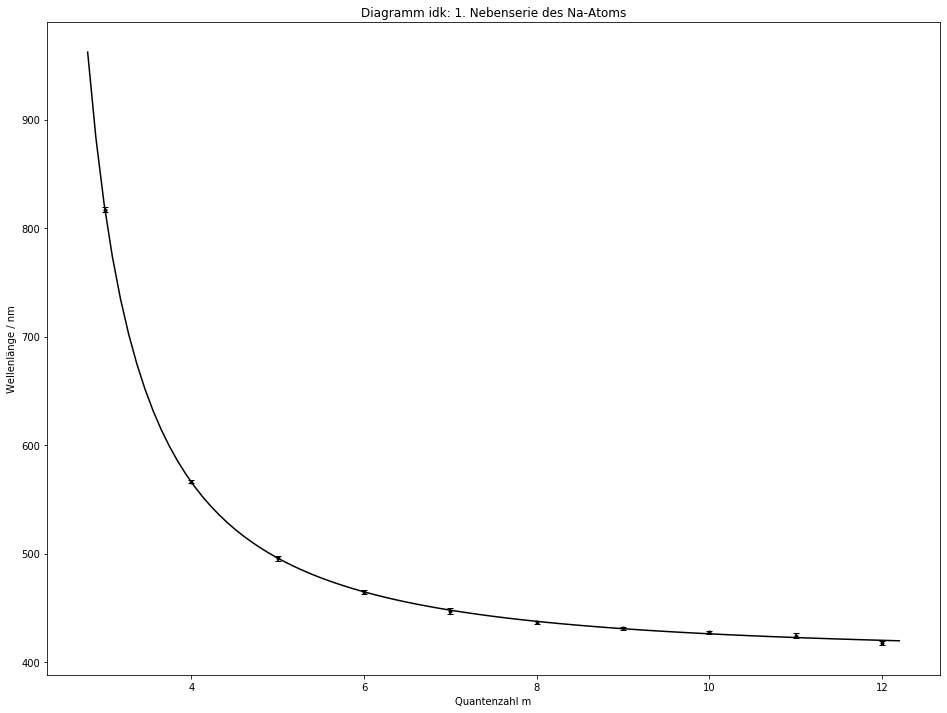

In [56]:
%matplotlib inline

wellenl = wl_neb1
dwellenl = d_wl_neb1
quantenz = np.arange(3,13)

plt.figure(figsize=(16,12))
plt.errorbar(quantenz, wellenl, dwellenl, fmt=".k", capsize = 3)
plt.xlabel('Quantenzahl m')
plt.ylabel('Wellenlänge / nm')
plt.title('Diagramm 8: 1. Nebenserie des Na-Atoms')

from scipy.optimize import curve_fit
def fit_func(m, E_Ry, E_3p, D_d):
    return 1.2398E3/(E_Ry/(m-D_d)**2-E_3p)

para = [-13.6,-3,-0.02]
popt, pcov = curve_fit(fit_func, quantenz, wellenl, sigma = dwellenl, p0 = para)
m=np.linspace(2.8,12.2,100)
plt.plot(m,fit_func(m,*popt), 'k')

Daraus lassen sich die Fitergebnisse ausgeben:

In [13]:
#Fitergebnisse
print("E_Ry=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("E_3p=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))
print("D_d=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))

E_Ry= -13.442032450414095 , Standardfehler= 0.4272654253941038
E_3p= -3.044560931105952 , Standardfehler= 0.006370054652679516
D_d= 0.033368479581507696 , Standardfehler= 0.042672777544758685


Es ergibt sich:
> $E_{Ry} = (-13.44 \pm 0.43) \space eV$ <br>
> $E_{3p} = (-3.04 \pm 0.006) \space eV$ <br>
> $\Delta_d = (0.03 \pm 0.04)$

Man sieht auf den ersten blick das der Fehler von $\Delta_d$ sehr hoch ist. Dies ist zu erwarten, da nach Praktikumsbeschreibung der Wert $\Delta_d$ eine Näherungsformel ist. Der Fit könnte also durchaus besser sein. Wir können die Weitere Güte des Fits noch mit dem Chi Quadrat Test ermitteln.

Es ist die $\chi^2$ Summe mit Hilfe der folgender Formel zu berechnen:

\begin{equation}
\chi^2 = \sum_i^n \left( \frac{Funktionswert_i - Messwert_i}{Fehler_i} \right)
\tag {18}
\end{equation}

Damit kann man auch $\chi_{red}^2 = \frac{\chi^2}{Freiheitsgrad}$ (19) bestimmen, wobei sich der Freiheitsgrad aus der Anzahl der Messwerte abzüglich der Zahl der Fitparameter berechnet.

In [14]:
chi2_ = np.sum((fit_func(quantenz, *popt)-wellenl)**2/dwellenl**2)
#Freiheitsrade
fhg = len(quantenz)-3
chi2_red = chi2_/fhg

print("chi2_=", chi2_)
print("chi2_red=", chi2_red)

chi2_= 4.3478050072732115
chi2_red= 0.6211150010390302


Es ergibt sich:
> $\chi^2 = 4.348$ <br>
> $\chi_{red}^2 = 0.621$

In [15]:
from scipy.stats import chi2
prob = round(1-chi2.cdf(chi2_,fhg),2)*100
print("Fitwahrscheinlichkeit:", prob, "%")

Fitwahrscheinlichkeit: 74.0 %


Aus berechnetem Chi-Quadrat Test können wir erkennen das sich 74 Prozent aller Chis entweder größer oder kleiner als der von uns bestimmte Wert ist. Damit ist unsere Fitwahrscheinlichkeit mit 74 Prozent sehr hoch und fast zu schön um wahr zu sein.

Aus dem Fit erhalten wir für unsere Parameter folgende Werte:

<center><u>Tabelle 10: Vergleichen der Parameter der 1. Nebenserie</u></center>

|Wert|Fit|Erwarteter Wert|
|---|-----------|---|
|$E_{Ry} $ | $-13.44 \pm 0.43 \space eV$ | $-13.605 eV$|
|$E_{3p} $ | $-3.04 \pm 0.006 \space eV$ |$-3.029 \pm 0.004 \space eV$|
|$\Delta_d$|  $0.03 \pm 0.04$            | |


Damit befinden sich die Rydberg Energiewerte der Theorie und der Messung in einer 0.4 $\sigma$ Umgebung zueinander, d.h. sie weichen nicht signifikant voneinander ab. Die Energie der 3p Zustandes weichen in Theorie und Messung um 1.5 $\sigma$ voneinander ab, sie weichen also ebenfalls nicht signifikant voneinander ab.

#### 3.3.2 Zweite Nebenserie

Es wird zunächst für die zweite Nebenserie des Natriumatoms die gefundene Linien als Funktion von der Quantenzahl m in der folgender Diagramm geplotted und die Funktion 

\begin{equation}
\lambda_m[nm] \approx \frac{1.2398 \cdot 10^3 [nm \space eV]}{E_{Ry}/(m-\Delta_s)^2 - E_{3p}[eV]}
\tag{20}
\end{equation}<br>

gefitted, wobei $E_{Ry}$, $E_{3p}$ und $\Delta_s$ als die freie Parametern des Fits gewählt sind.

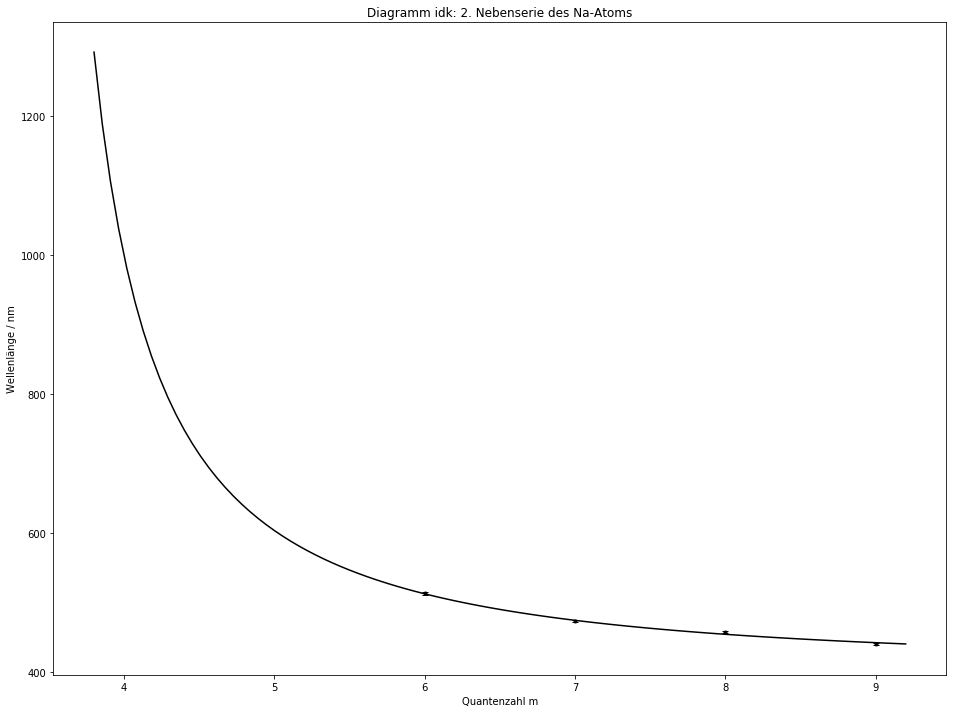

In [96]:
%matplotlib inline

neb_2 = np.genfromtxt('https://raw.githubusercontent.com/Meistermagier/PAP2/master/Experiment%20234/Natriumspektrum/Nebenserie2.csv', delimiter=',')
wl_neb2 = neb_2[3:,3]
d_wl_neb2 = neb_2[3:,4]

wellenl2 = wl_neb2
dwellenl2 = d_wl_neb2
quantenz2 = np.arange(6,10)

plt.figure(figsize=(16,12))
plt.errorbar(quantenz2, wellenl2, dwellenl2, fmt=".k", capsize = 3)
plt.xlabel('Quantenzahl m')
plt.ylabel('Wellenlänge / nm')
plt.title('Diagramm 9: 2. Nebenserie des Na-Atoms')

from scipy.optimize import curve_fit
def fit_func2(m2, E_Ry2, E_3p2, D_s):
    return 1.2398E3/(E_Ry2/(m2-D_s)**2-E_3p2)

para2 = [-13.6,-3,-0.02]
popt2, pcov2 = curve_fit(fit_func2, quantenz2, wellenl2, sigma = dwellenl2, p0 = para2)
m2 = np.linspace(3.8,9.2,100)
plt.plot(m2,fit_func2(m2,*popt2), 'k')

In [97]:
#Fitergebnisse
print("E_Ry=",popt2[0], ", Standardfehler=", np.sqrt(pcov2[0][0]))
print("E_3p=",popt2[1], ", Standardfehler=", np.sqrt(pcov2[1][1]))
print("D_s=",popt2[2], ", Standardfehler=", np.sqrt(pcov2[2][2]))

E_Ry= -14.677126421854929 , Standardfehler= 17.700606060270026
E_3p= -3.042809807697879 , Standardfehler= 0.16462602572752197
D_s= 1.1456302030975323 , Standardfehler= 2.3327375017839684


Es ergibt sich:
> $E_{Ry} = (-14.68 \pm 17.7) \space eV$ <br>
> $E_{3p} = (-3.04 \pm 0.16) \space eV$ <br>
> $\Delta_s = (1.15 \pm 2.33)$

Man berechnet jetzt nach Gleichungen (18) und (19) die Werte $\chi^2$ und $\chi_{red}^2$ für die zweite Nebenserie. Damit ist auch wie bei der ersten Nebenserie die Fitwahrscheinlichkeit zu bestimmen.

In [98]:
chi2_2 = np.sum((fit_func2(quantenz2, *popt2)-wellenl2)**2/dwellenl2**2)
#Freiheitsrade
fhg2 = len(quantenz2)-3
chi2_2red = chi2_2/fhg2

print("chi2_2=", chi2_)
print("chi2_2red=", chi2_red)

chi2_2= 5.8031984262994705
chi2_2red= 5.8031984262994705


Es ergibt sich:
> $\chi^2 = 5.803$ <br>
> $\chi_{red}^2 = 5.803$

In [99]:
prob = round(1-chi2.cdf(chi2_,fhg),2)*100
print("Fitahrscheinlichkeit:", prob, "%")

Fitahrscheinlichkeit: 2.0 %


Wie man am Chi-Quadrat Test erkennen kann befinden sich nur 2% aller Chi-Quadrate innerhalb der ermittelten Parameter, d.h. dieser Fit ist sehr schlecht. Das könnte an mehreren Faktoren liegen, Stichwort Anzahl und Messwerten, auf die in der Diskussion nocheinmal genauer Eingegangen wird.

Wir haben folgende Werte für den Fit erhalten und diese vergleichen wir mit ihren Theoriewerten:

<center><u>Tabelle 11: Vergleichen der Parameter der 2. Nebenserie</u></center>

|Wert|Fit|Erwarteter Wert|
|---|-----------|---|
|$E_{Ry}  $| $-14.68 \pm 17.7 \space eV$|$-13.605 eV$|
|$E_{3p}  $| $-3.04 \pm 0.16 \space eV$ |$-3.029 \pm 0.004 \space eV$|
|$\Delta_s$| $1.15 \pm 2.33$           |$1.372 \pm 0.0006$|

Hierbei weichen die Rydberg Energieen um 0.06 $\sigma$ voneinander ab, allerdings ist der Fehler gewaltig daher ist das sicherlich keine genaue Aussage. Die ermittelte Energie des 3p Zustandes befindet sich innerhalb von 0.07 $\sigma$. Die  $\Delta_s$ weichen gerade einmal um 0.1 $\sigma$ voneinander ab. Auch hier ist der Fehler des Fits riesig. Daher lässt sich sicher sagen, dass unser Fit wie der Chi-Quadrat Test zeigt eher schlecht ist.